In [1]:
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funciones as f
import matplotlib.cm as cm

# Consigna 1

$(I − A)^{−1} = I + A + A^2 + A^3  +  . . . $

Lo reescribimos como

$(I − A)^{−1} = \lim_{n \to ∞}  \sum _{i=0}^{n} A^i \leftrightarrow $


$(I − A)(I − A)^{−1} = (I − A)\lim_{n \to ∞}  \sum _{i=0}^{n} A^i \leftrightarrow$

$I = (I − A)\lim_{n \to ∞}  \sum _{i=0}^{n} A^i \leftrightarrow$


$I = \lim_{n \to ∞}  \sum _{i=0}^{n} (I − A) A^i $


Usando distributiva


$I = \lim_{n \to ∞}  \sum _{i=0}^{n} A^i - A A^i \leftrightarrow$


$I = \lim_{n \to ∞}  \sum _{i=0}^{n} A^i - A^{i+1} $

Usando la telescópica ('sobra' el primero y último)

$I = \lim_{n \to ∞} I -  A^{n+1} \leftrightarrow$

$I = I - \lim_{n \to ∞} A^{n+1} \leftrightarrow$

$0 =  \lim_{n \to ∞} A^{n+1} $


# Consigna 2

In [2]:

A1 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
                [0.24, 0.073, 0.219, 0.013, 0.327],
                [0.098, 0.12, 0.311, 0.302, 0.208],
                [0.173, 0.03, 0.133, 0.14, 0.074],
                [0.303, 0.256, 0.323, 0.225, 0.257]])

A2 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
                [0.24, 0.073, 0.219, 0.013, 0.327],
                [0.098, 0.12, 0.311, 0.302, 0.208],
                [0.173, 0.03, 0.133, 0.14, 0.074],
                [0.003, 0.256, 0.323, 0.225, 0.257]])

In [3]:
a1 = np.empty(250)
a2 = np.empty(250)


In [4]:
for i in range (250):
    a1[i] =la.norm(np.linalg.matrix_power(A1, i+1), 2)
    a2[i] =la.norm(np.linalg.matrix_power(A2, i+1), 2)

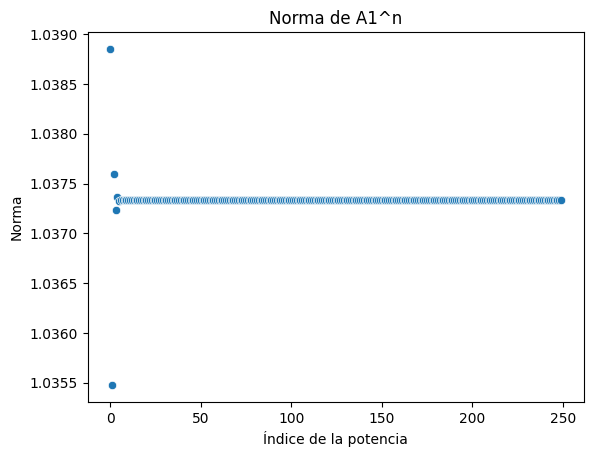

In [5]:
fig = sns.scatterplot(a1)
fig.set_title("Norma de A1^n")
fig.set_xlabel("Índice de la potencia")
fig.set_ylabel("Norma")
plt.show()

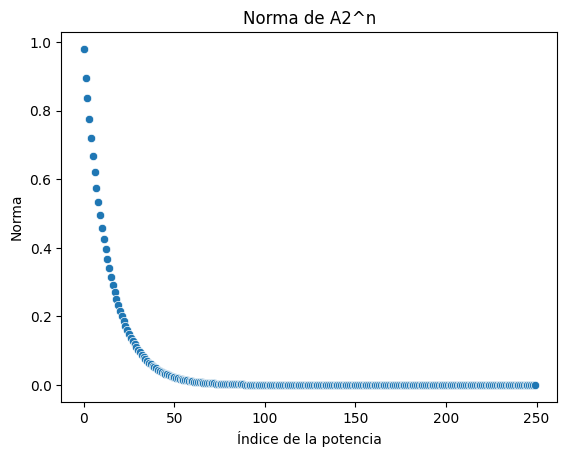

In [6]:
fig = sns.scatterplot(a2)
fig.set_title("Norma de A2^n")
fig.set_xlabel("Índice de la potencia")
fig.set_ylabel("Norma")
plt.show()

# Consigna 3

In [7]:
autoval1, autovect1, tabla1 = f.metodoPotencia(A1, 0.999999999)
autoval2, autovect2, tabla2 = f.metodoPotencia(A2, 0.999999999)


prom1 = np.average(tabla1)
desvio1 = np.std(tabla1)

prom2 = np.average(tabla2)
desvio2 = np.std(tabla2)

print("Matriz        Promedio autovalores        Desvío estandar")
print("A1           ", np.round(prom1,3), "                       ", np.round(desvio1, 3))
print("A2           ", np.round(prom2,3), "                       ", np.round(desvio2, 3))

Matriz        Promedio autovalores        Desvío estandar
A1            0.99                         0.039
A2            0.92                         0.038


# Consigna 4

### a)

In [8]:
_, norma_A1_n10 = f.sumaGeom(A1, 10)
_, norma_A2_n10 = f.sumaGeom(A2, 10)
suma_A2_n10, norma_A1_n100 = f.sumaGeom(A1, 100)
suma_A2_n100, norma_A2_n100 = f.sumaGeom(A2, 100)

print("Norma de A1 con n = 100:", np.round(norma_A1_n100[-1], 1))
print("Norma de A2 con n = 100:", np.round(norma_A2_n100[-1], 1))

Norma de A1 con n = 100: 104.7
Norma de A2 con n = 100: 14.4


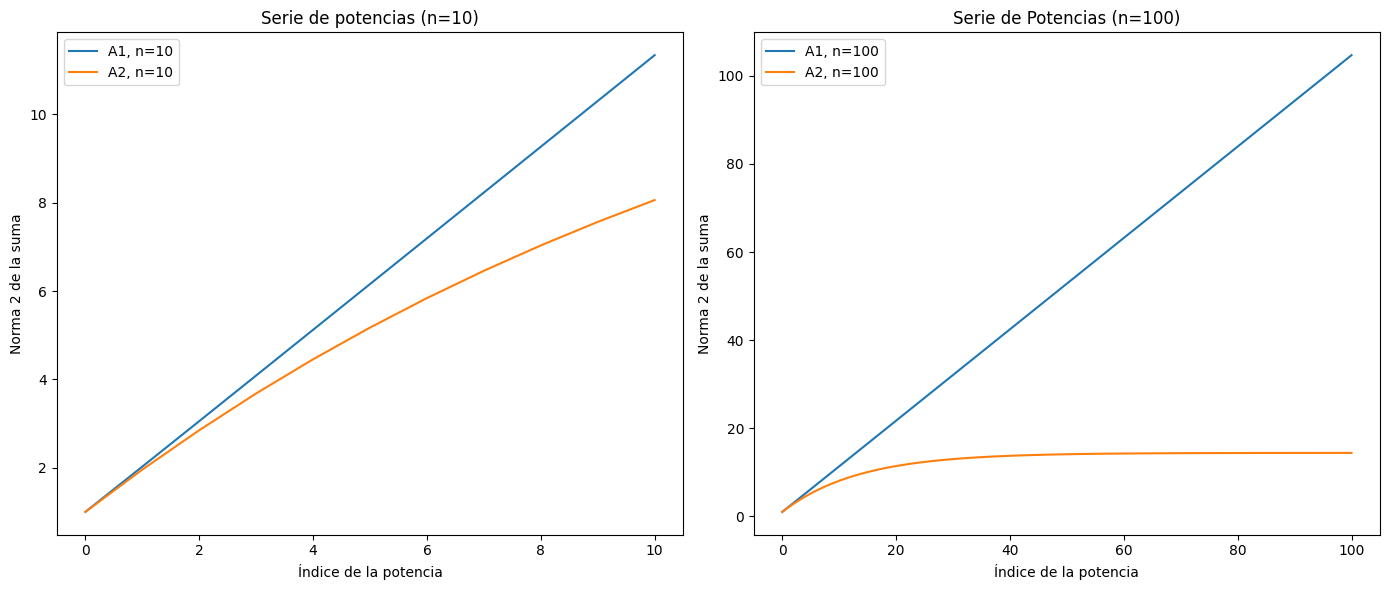

In [9]:
# Graficar
plt.figure(figsize=(14, 6))

# Gráfica para n = 10
plt.subplot(1, 2, 1)
plt.plot(range(len(norma_A1_n10)), norma_A1_n10, label="A1, n=10")
plt.plot(range(len(norma_A2_n10)), norma_A2_n10, label="A2, n=10")
plt.title("Serie de potencias (n=10)")
plt.xlabel("Índice de la potencia")
plt.ylabel("Norma 2 de la suma")
plt.legend()


# Gráfica para n = 100
plt.subplot(1, 2, 2)
plt.plot(range(len(norma_A1_n100)), norma_A1_n100, label="A1, n=100")
plt.plot(range(len(norma_A2_n100)), norma_A2_n100, label="A2, n=100")
plt.title("Serie de Potencias (n=100)")
plt.xlabel("Índice de la potencia")
plt.ylabel("Norma 2 de la suma")
plt.legend()

plt.tight_layout()
plt.show()

### b)

Para n = 10 ambas matrices muestran un crecimiento en la norma de la serie acumulada de potencias, todavía no es suficiente para determinar si convergen.

Para A1, la norma 2 de la serie continúa creciendo conforme aumentan las iteraciones, especialmente evidente en la gráfica para n = 100. Esto sugiere que la serie de potencias no converge, ya que no se estabiliza en un valor límite.

Para A2, con n = 100, la serie parece acercarse asintóticamente a un valor cercano a 14.4, lo cual indica que la serie de potencias converge.

### c)

Por la **Consigna 1**, podemos decir que si $\lim_{n \to ∞} \lVert A^{n} \lVert _2 \neq 0$, entonces la serie no converge.

La serie de potencias $I + ∑_{i=1}^{∞} A^{i}$ tiende a $(I-A)^{-1} \Leftrightarrow ρ(A) < 1$ y, entonces, $\lim_{n \to ∞} \lVert A^{n} \lVert _2 = 0$. Con el método de la potencia podemos iterativamente aproximar el autovalor dominante. En otras palabras, si el valor obtenido con el método de la potencia es menor que 1 en módulo, podemos asegurar que converge.

### d)

In [10]:
# Calculamos el error usando A2, ya que es la matriz que converge
I = np.eye(A2.shape[0])
P, L, U = f.calcularLU(I - A2)
leont = f.inversaLU(P,L,U)
errorA2 = f.error(A2, leont, 100)

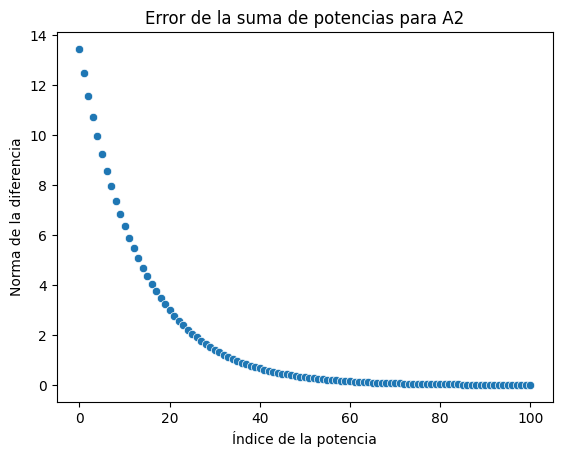

In [11]:
fig = sns.scatterplot(errorA2)
fig.set_title("Error de la suma de potencias para A2")
fig.set_xlabel("Índice de la potencia")
fig.set_ylabel("Norma de la diferencia")
plt.show()

Vemos que $e(n) \xrightarrow[n \to \infty]{} 0$, o sea que $(I + ∑_{i=1}^{n} A^{i}) \xrightarrow[n \to \infty]{} (I-A)^{-1}$.

# Consigna 5

In [12]:
# Cargar el archivo Excel
archivo = 'matrizlatina2011_compressed_0.xlsx'
hoja = 'LAC_IOT_2011'

# Cargar la hoja específica en un DataFrame
df = pd.read_excel(archivo, sheet_name=hoja)

In [13]:
#Filtrar filas
df_HND = df[df['Country_iso3'] == 'HND']
df_SLV = df[df['Country_iso3'] == 'SLV']

nombre_sectores = df_SLV['Sector']
nombre_sectores = nombre_sectores.reset_index(drop=True)

sectores = df_SLV['Nosector']
sectores = sectores.reset_index(drop=True)

# Mantener que empiezan con 'HNDs' o el 'SLVs' respectivamente (y la columna Output)
columnas_interes = [col for col in df.columns if col.startswith('HND')] + ['Output']
df_HND_HND = df_HND[columnas_interes]

columnas_interes = [col for col in df.columns if col.startswith('SLV')] + ['Output']
df_SLV_SLV = df_SLV[columnas_interes]

columnas_interes = [col for col in df.columns if col.startswith('SLV')]
df_HND_SLV = df_HND[columnas_interes]

columnas_interes = [col for col in df.columns if col.startswith('HND')]
df_SLV_HND = df_SLV[columnas_interes]

df_HND_HND = df_HND_HND.reset_index(drop=True)
df_SLV_SLV = df_SLV_SLV.reset_index(drop=True)
df_HND_SLV = df_HND_SLV.reset_index(drop=True)
df_SLV_HND = df_SLV_HND.reset_index(drop=True)


# Reemplazar ceros por unos solo en la columna 'Output'
# Sino no se puede calcular los coeficientes técnicos porque se divide por 0
# Tampoco queremos eliminar sectores sin producción que sería una alternativa
df_HND_HND['Output'] = df_HND_HND['Output'].replace(0, 1)
df_SLV_SLV['Output'] = df_SLV_SLV['Output'].replace(0, 1)

# Extraer la matriz de insumos (z_hnd) y la producción total (p_hnd) para HND
z_hnd_hnd = df_HND_HND.iloc[:, :-1].values  # Todas las columnas excepto 'Output'
p_hnd_hnd = df_HND_HND['Output'].values     # Columna 'Output'

# Extraer la matriz de insumos (z_slv) y el vector de producción total (p_slv) para SLV
z_slv_slv = df_SLV_SLV.iloc[:, :-1].values
p_slv_slv = df_SLV_SLV['Output'].values

# matrices de insumos de un país al otro
z_hnd_slv = df_HND_SLV.values
z_slv_hnd = df_SLV_HND.values

z_hnd_slv = z_hnd_slv[:, :]
z_slv_hnd = z_slv_hnd[:, :]

# Calcular los coeficientes técnicos
A_hnd_hnd = f.coeficientesTécnicos(z_hnd_hnd, p_hnd_hnd)
A_slv_slv = f.coeficientesTécnicos(z_slv_slv, p_slv_slv)



In [14]:
autovalAhh, autovectAhh, tablah = f.metodoPotencia(A_hnd_hnd, 0.999999999)
autovalAsalsal, autovectAsalsal, tablaSal = f.metodoPotencia(A_slv_slv, 0.999999999)

print("Mayor autovalor A_hnd_hnd:", np.round(autovalAhh, 2))
print("Mayor autovalor A_slv_slv:", np.round(autovalAsalsal, 2))

Mayor autovalor A_hnd_hnd: 0.56
Mayor autovalor A_slv_slv: 0.26


Vemos que los radios espectrales de ambas matrices son menores a 1, entonces las sumas de potencias de ambas convergen a su respectiva $(I-A)^{-1}$.

Miremos que las normas 2 de las sumas de potencias no tienden a infinito, sumando hasta distintos n:

In [15]:
sumaHonduras, tablaPotenciasHND = f.sumaGeom(A_hnd_hnd, 50)
sumaSalvador, tablaPotenciasSLV = f.sumaGeom(A_slv_slv, 50)

print("Norma 2 de la sumatoria de A_hnd_hnd con n=50 =", np.round(tablaPotenciasHND[50], 2)) # norma de A_hnd_hnd**250
print("Norma 2 de la sumatoria de A_slv_slv con n=50 =", np.round(tablaPotenciasSLV[50], 2)) # norma de A_slv_slv**250


Norma 2 de la sumatoria de A_hnd_hnd con n=50 = 2.29
Norma 2 de la sumatoria de A_slv_slv con n=50 = 1.73


In [16]:
sumaHonduras, tablaPotenciasHND = f.sumaGeom(A_hnd_hnd, 2000)
sumaSalvador, tablaPotenciasSLV = f.sumaGeom(A_slv_slv, 2000)

print("Norma 2 de la sumatoria de A_hnd_hnd con n=2000 =", np.round(tablaPotenciasHND[2000], 2)) # norma de A_hnd_hnd**250
print("Norma 2 de la sumatoria de A_slv_slv con n=2000 =", np.round(tablaPotenciasSLV[2000], 2)) # norma de A_slv_slv**250


Norma 2 de la sumatoria de A_hnd_hnd con n=2000 = 2.29
Norma 2 de la sumatoria de A_slv_slv con n=2000 = 1.73


Para ninguna sumas de potencias se aprecia diferencia entre sus normas con $n = 50$ y $n = 2000$.  

# Consigna 6

### a)
Sabemos que la matriz resultante por un vector z tendra la forma:

$
\begin{bmatrix}
1-1/n & -1/n & ... & -1/n\\
-1/n & 1-1/n & ... & -1/n\\
... & ... & ... & ...\\
-1/n & -1/n & -1/n & 1-1/n
\end{bmatrix}
\begin{bmatrix}
z_1  \\
z_2  \\
... \\
z_n
\end{bmatrix}
$

resultando un vector de $n \times 1$.

La componente i-ésima del resultado será $z_{i} - \sum_{j=0}^{n} z_{j}/n = z_{i} - 1/n \cdot \sum_{j=0}^{n} z_{j}$

Entonces, la suma de las componentes del vector resultante será $\sum_{i=0}^{n} z_{i} - n \cdot \sum_{j=0}^{n} z_{j}/n = \\ = \sum_{i=0}^{n} z_{i} - n \cdot 1/n \cdot\sum_{j=0}^{n} z_{j} = \sum_{i=0}^{n} z_{i} - \sum_{j=0}^{n} z_{j} = 0$ 

Por lo tanto, el vector resultado siempre tendrá componentes que suman 0 para todo $z \in \Re^{n}$.

Cualquier matriz $A \in \Re^{n \times n}$ puede ser pensada como $n$ vectores columna uno al lado del otro. Entonces la matriz resultante de hacer $E_{n} A$ tendrá columnas cuyos componentes suman 0.


### b)

Cosiderando la base de vectores sugerida vemos que si hacemos:

$
(I_{n} - \frac{1}{n}ee^{t})e = e - \frac{1}{n}e*n = e - e = 0
$

Por lo tanto vemos que tiene un autovalor 0 con multiplicidad 1 con su autovector asociado e

Analogamente, consideramos los vectores del subespacio ortogonal a e y vemos que:

$
(I_{n} - \frac{1}{n}ee^{t})e^{\perp} = e^{\perp} - \frac{1}{n}e*0 = e^{\perp}  - 0 = e^{\perp}
$

para una base de n-1 autovectores ortogonales a e con autovalor asociado 1 de multiplicidad n-1


como el $ker(En) = En*z = 0$ y sabemos la multiplicidad del autovalor 0, la dimension del nucleo de a va a ser 1 para $z \in <e> $

La imagen como contraparte (y por teorema de la dimensión), va a tener dimensión n-1 y va a estar formada por la base de los vectores ortogonales a e, $<e>^{\perp} $


### c)
Para probar si es proyector ortogonal, veo si es simétrica y si $ P^{2} = P$

$(I_{n} - \frac{1}{n}ee^{t})(I_{n} - \frac{1}{n}ee^{t}) = I_{n} - \frac{1}{n}ee^{t} - \frac{1}{n}ee^{t} + \frac{1}{n^{2}}ee^{t}ee^{t} = I_{n} - \frac{1}{n}ee^{t}$

Confirmamos que $ P^{2} = P$

Y simetría es trivial, dado que $I_{n}$ es simétrica y $ee^{t}$ es simétrica
$\Rightarrow$ es una matriz de proyección ortogonal.

En particular, como $ee^{t}$ es un proyector $ I - ee^{t} $ es el proyector complemetario.

Como un proyector deja invariante su imagen, sabemos que $E_{z}$ proyecta sobre el subespacio generado por $<e>^{\perp}$
### d)

#### I) Falso
Para cualquier $n$, el producto interno entre dos columnas distintas de $E_{n}$ será igual a $(n-2)\cdot (\frac{-1}{n})^{2} + 2\cdot (1-\frac{1}{n})\cdot (\frac{-1}{n}) = (n-2) \cdot \frac{1}{n^{2}} + 2(\frac{-1}{n} + \frac{1}{n^{2}}) = \frac{1}{n} - \frac{2}{n^{2}} - \frac{2}{n} + \frac{2}{n^{2}} = \frac{1}{n} - \frac{2}{n} = \frac{-1}{n} \neq 0$

La matriz no es ortogonal porque sus columnas no lo son. 

#### II) Verdadero
Como vimos en el inciso b), $E_{n} $ tiene un autovalor $ \lambda = 0$, por lo tanto la matriz es singular.

#### III) Falso
Una matriz $A \in \mathbb{R^{n \times n}}$ es definida positiva si $\forall \mathbb{x}\in \mathbb{R^{n}}, \mathbb{x^{t}} A  \mathbb{x} > 0$. 

Para todo $n$, si multiplicamos a $E_{n}$ por el vector $e$ (unos en todas las componentes), obtenemos un vector de ceros: \
Cada componente de $E_{n} e$ será igual a $1 - \frac{1}{n} + \sum_{i=0}^{n-1} \frac{-1}{n} = 1 - \frac{n}{n} = 0$ 

Entonces $E_{n} e = \vec{0}$, y $e^{t}E_{n}e = 0$

Tambien sabemos que por tener autovalor = 0  $x_{t}E_{n}x$ va a ser 0 para un x distinto de 0, en este caso el autovector asociado.


##### IV) Verdadero
$traza(E_n) = \sum_{i=1}^{n} I_{n_{ii}} -(1/n)*e_i*e_i^{t}  
=  \sum_{i=1}^{n} 1 - (1/n)*1*1  = \sum_{i=1}^{n} (n-1)/n = n*(n-1)/n = n-1 $

# Consigna 7

In [17]:
# Normalizar Arr usando E_40
n = 40
E_40 = np.eye(n) - (1 / n) * np.ones((n, n))
A_hnd_hnd_normalizada = E_40 @ A_hnd_hnd

# Calcular la matriz de covarianzas C
C = (np.transpose(A_hnd_hnd_normalizada) @ A_hnd_hnd_normalizada) / (n - 1)

# Encontrar el primer autovalor y autovector usando metodoPotencia
lambda1, v1, _ = f.metodoPotencia(C, 0.999999999)


print("Primer autovalor: ", np.round(lambda1, 4))
print("")
print("Primer autovector: \n", np.round(v1, 3))
print("")
print("")
print("")


# Deflación de Hotelling:
# Creamos la nueva matriz C' eliminando la componente del primer autovector
C_deflacionada = C - (lambda1 * np.outer(v1, v1))
lambda2, v2, _ = f.metodoPotencia(C_deflacionada, 0.999999999)


print("Segundo autovalor: ", np.round(lambda2, 4))
print("")
print("Segundo autovector: \n", np.round(v2, 3))



Primer autovalor:  0.0168

Primer autovector: 
 [ 0.043 -0.002  0.     0.002  0.48   0.063  0.445  0.738  0.006  0.132
 -0.037 -0.006  0.006 -0.     0.003  0.     0.012  0.01   0.015 -0.002
 -0.001  0.    -0.04  -0.003  0.003  0.     0.     0.     0.     0.
  0.     0.    -0.     0.008 -0.006  0.007  0.    -0.002  0.001  0.01 ]



Segundo autovalor:  0.008

Segundo autovector: 
 [ 0.002  0.004  0.    -0.    -0.005  0.003  0.003  0.004  0.002  0.022
  0.783  0.087  0.038  0.009  0.005  0.     0.008  0.001  0.001  0.098
 -0.041  0.    -0.599  0.003 -0.001  0.     0.     0.     0.     0.
  0.     0.     0.059  0.001 -0.057  0.003  0.004  0.002 -0.002  0.002]


# Consigna 8

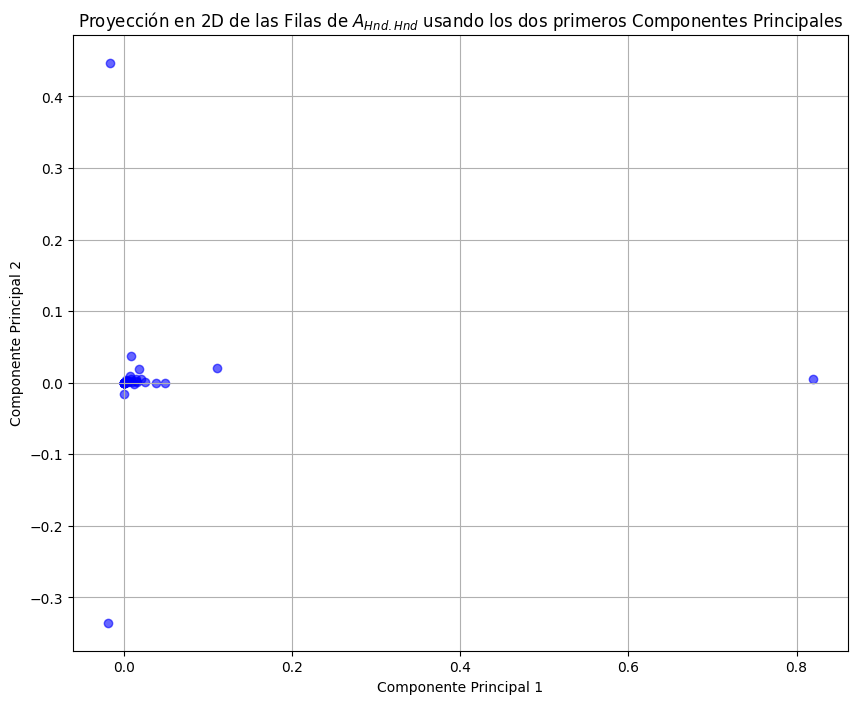

In [18]:
V = np.column_stack((v1, v2))  # Matriz con v1 y v2 como columnas

#Proyectar las filas de A_hnd_hnd en el nuevo espacio de 2 dimensiones
Arr_proyectado = A_hnd_hnd @ V

xHND = Arr_proyectado[:, 0]
yHND = Arr_proyectado[:, 1]

#Graficar el scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(xHND, yHND, color='b', alpha=0.6)
plt.title("Proyección en 2D de las Filas de $A_{Hnd.Hnd}$ usando los dos primeros Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

plt.show()

Veamos si podemos observar clusters si sacamos los puntos que están en el origen y los outliers:

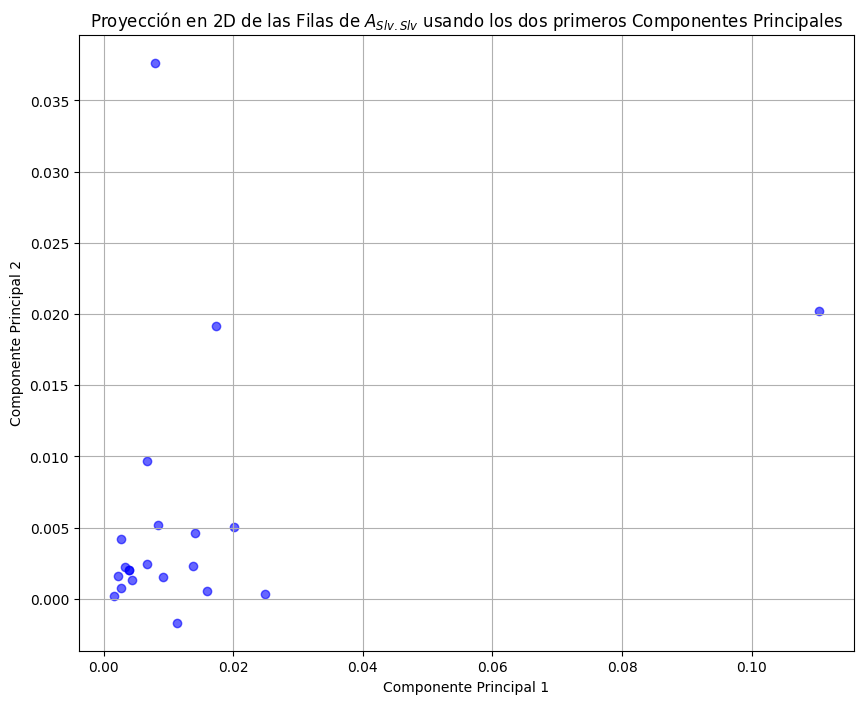

In [19]:
xHsinOutliers = np.where(abs(xHND)<0.6)

xHNDreducido = xHND[xHsinOutliers]
yHNDreducido = yHND[xHsinOutliers]


xHsinCero = np.where(abs(xHNDreducido)> 0.001)

xHNDreducido = xHNDreducido[xHsinCero]
yHNDreducido = yHNDreducido[xHsinCero]


yHsinOutliers = np.where(abs(yHNDreducido) < 0.3)

xHNDreducido = xHNDreducido[yHsinOutliers]
yHNDreducido = yHNDreducido[yHsinOutliers]


yHsinCero = np.where(abs(yHNDreducido) > 0.0001)

xHNDreducido = xHNDreducido[yHsinCero]
yHNDreducido = yHNDreducido[yHsinCero]


listaH = []
for i in yHsinCero:
    listaH.append(i)
#lista = np.array(lista)

sectRedux = []
for i in listaH:
    sectRedux.append(sectores[i])
sectRedux = sectRedux[0]

#Graficar el scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(xHNDreducido, yHNDreducido, color='b', alpha=0.6)
plt.title("Proyección en 2D de las Filas de $A_{Slv.Slv}$ usando los dos primeros Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

plt.show()

Como no podemos observar dos o más clusters de 3 tres o más sectores cada uno con la los datos de Honduras, repetiremos las **Consignas 7 y 8** para El Salvador:

In [20]:
# Normalizar Ass usando E_40
n = 40
E_40 = np.eye(n) - (1 / n) * np.ones((n, n))
A_slv_slv_normalizada = E_40 @ A_slv_slv

# Calcular la matriz de covarianzas C
C = (np.transpose(A_slv_slv_normalizada) @ A_slv_slv_normalizada) / (n - 1)

# Encontrar el primer autovalor y autovector usando metodoPotencia
lambda11, v11, _ = f.metodoPotencia(C, 0.999999999)


print("Primer autovalor: ", np.round(lambda11, 4))
print("")
print("Primer autovector: \n", np.round(v11, 3))
print("")
print("")
print("")


# Deflación de Hotelling:
# Creamos la nueva matriz C' eliminando la componente del primer autovector
C_deflacionada = C - (lambda11 * np.outer(v11, v11))
lambda22, v22, _ = f.metodoPotencia(C_deflacionada, 0.999999999)

print("Segundo autovalor: ", np.round(lambda22, 4))
print("")
print("Segundo autovector: \n", np.round(v22, 3))



Primer autovalor:  0.0104

Primer autovector: 
 [0.067 0.062 0.    0.215 0.181 0.151 0.215 0.247 0.215 0.    0.121 0.116
 0.272 0.096 0.194 0.386 0.232 0.182 0.307 0.162 0.123 0.091 0.082 0.078
 0.091 0.    0.098 0.    0.063 0.048 0.093 0.097 0.092 0.083 0.03  0.235
 0.18  0.122 0.069 0.171]



Segundo autovalor:  0.003

Segundo autovector: 
 [-0.131  0.027  0.     0.083 -0.529 -0.333 -0.536 -0.219  0.056  0.
 -0.03   0.043  0.071 -0.273  0.139  0.14   0.11   0.083  0.113  0.119
  0.021  0.082  0.074  0.047  0.046  0.     0.058  0.     0.038  0.029
  0.056  0.059  0.014  0.089  0.022  0.081  0.162  0.059  0.037  0.064]


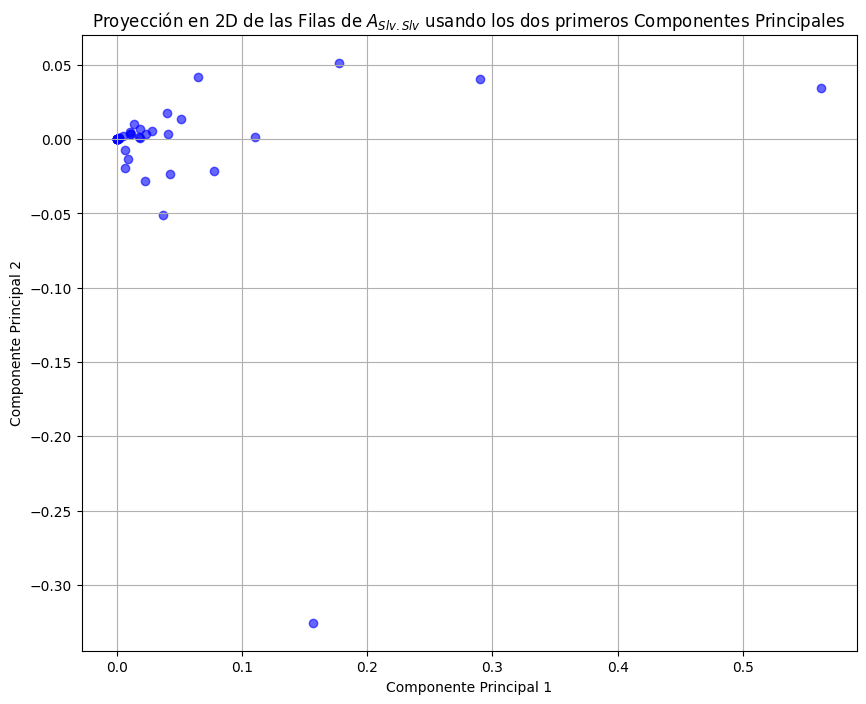

In [21]:
V = np.column_stack((v11, v22))  # Matriz con v1 y v2 como columnas

Ass_proyectado = A_slv_slv @ V

xSLV = Ass_proyectado[:, 0]
ySLV = Ass_proyectado[:, 1]

#Graficar el scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(xSLV, ySLV, color='b', alpha=0.6)
plt.title("Proyección en 2D de las Filas de $A_{Slv.Slv}$ usando los dos primeros Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

plt.show()

Saquemos los puntos que en el origen y los outliers para visualizar mejor si hay clusters. 

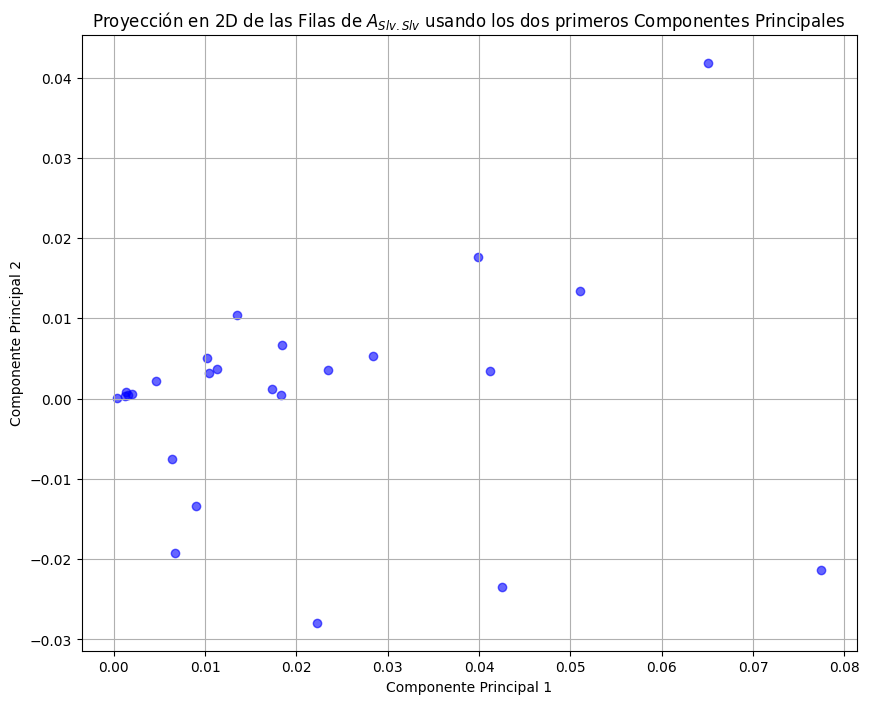

In [22]:
xSsinOutliers = np.where(abs(xSLV)<0.1)

xSLVreducido = xSLV[xSsinOutliers]
ySLVreducido = ySLV[xSsinOutliers]


xSsinCero = np.where(abs(xSLVreducido)> 0.0001)

xSLVreducido = xSLVreducido[xSsinCero]
ySLVreducido = ySLVreducido[xSsinCero]


ySsinOutliers = np.where(abs(ySLVreducido) < 0.05)

xSLVreducido = xSLVreducido[ySsinOutliers]
ySLVreducido = ySLVreducido[ySsinOutliers]

ySsinCero = np.where(abs(ySLVreducido) > 0.0001)

xSLVreducido = xSLVreducido[ySsinCero]
ySLVreducido = ySLVreducido[ySsinCero]



listaS = []
for i in ySsinCero:
    listaS.append(i)


sectRedux = []
for i in listaS:
    sectRedux.append(sectores[i])
sectRedux = sectRedux[0]


plt.figure(figsize=(10, 8))
plt.scatter(xSLVreducido, ySLVreducido, color='b', alpha=0.6)
plt.title("Proyección en 2D de las Filas de $A_{Slv.Slv}$ usando los dos primeros Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

plt.show()


C:\Users\Giovanni\AppData\Local\Temp\ipykernel_14416\4020637337.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = cm.get_cmap('tab10', n_sectores)


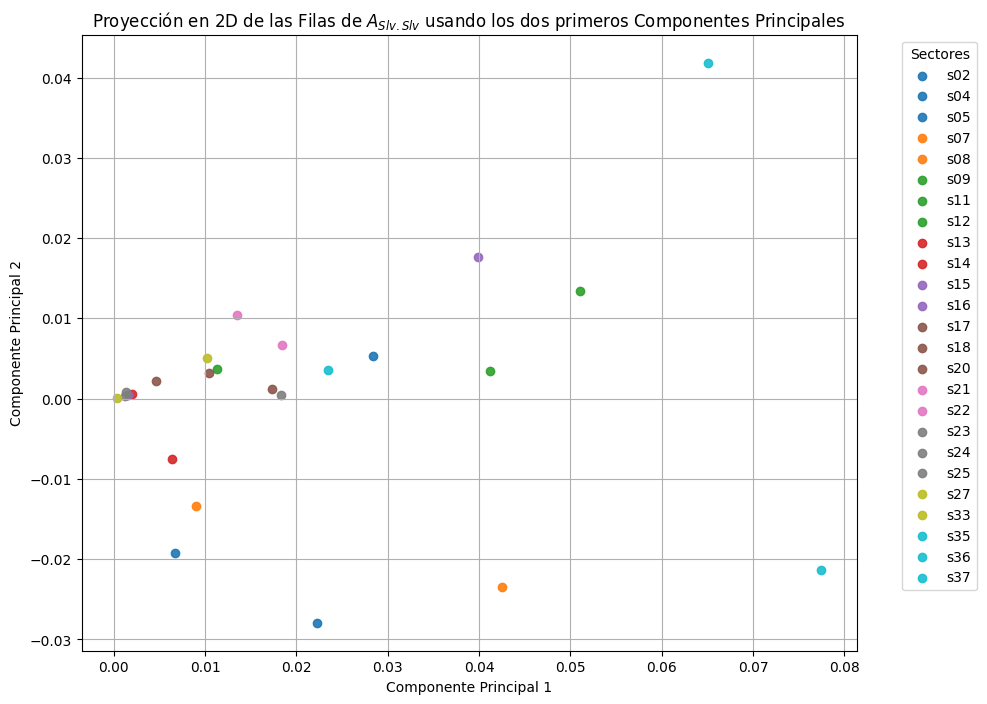

In [23]:
xSsinOutliers = np.where(abs(xSLV) < 0.1)

xSLVreducido = xSLV[xSsinOutliers]
ySLVreducido = ySLV[xSsinOutliers]

sectores_reducidos = np.array(sectores)[xSsinOutliers]


xSsinCero = np.where(abs(xSLVreducido) > 0.0001)

xSLVreducido = xSLVreducido[xSsinCero]
ySLVreducido = ySLVreducido[xSsinCero]

sectores_reducidos = sectores_reducidos[xSsinCero]


ySsinOutliers = np.where(abs(ySLVreducido) < 0.05)
xSLVreducido = xSLVreducido[ySsinOutliers]
ySLVreducido = ySLVreducido[ySsinOutliers]
sectores_reducidos = sectores_reducidos[ySsinOutliers]


ySsinCero = np.where(abs(ySLVreducido) > 0.0001)
xSLVreducido = xSLVreducido[ySsinCero]
ySLVreducido = ySLVreducido[ySsinCero]
sectores_reducidos = sectores_reducidos[ySsinCero]

# Número de sectores restantes
n_sectores = xSLVreducido.shape[0]
colores = cm.get_cmap('tab10', n_sectores)

# Graficar el scatter plot
plt.figure(figsize=(10, 8))
for i in range(n_sectores):
    etiq = str(sectores_reducidos[i])
    plt.scatter(xSLVreducido[i], ySLVreducido[i], color=colores(i), label=etiq, alpha=0.9)

plt.title("Proyección en 2D de las Filas de $A_{Slv.Slv}$ usando los dos primeros Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.legend(title="Sectores", bbox_to_anchor=(1.05, 1), loc='upper left')


######
# Para ponerle label a cada punto, descomentar este for
#for i, sector in enumerate(sectores_reducidos):
#    plt.annotate(sector, (xSLVreducido[i], ySLVreducido[i]), textcoords="offset points", xytext=(5, 5), ha="center")
    

plt.show()

En este gráfico sí se pueden ver algunos clusters. Hagamos gráficos con KMeans para separarlos.

c:\Users\Giovanni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Giovanni\AppData\Local\Temp\ipykernel_14416\2688995258.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = cm.get_cmap('tab10', k)


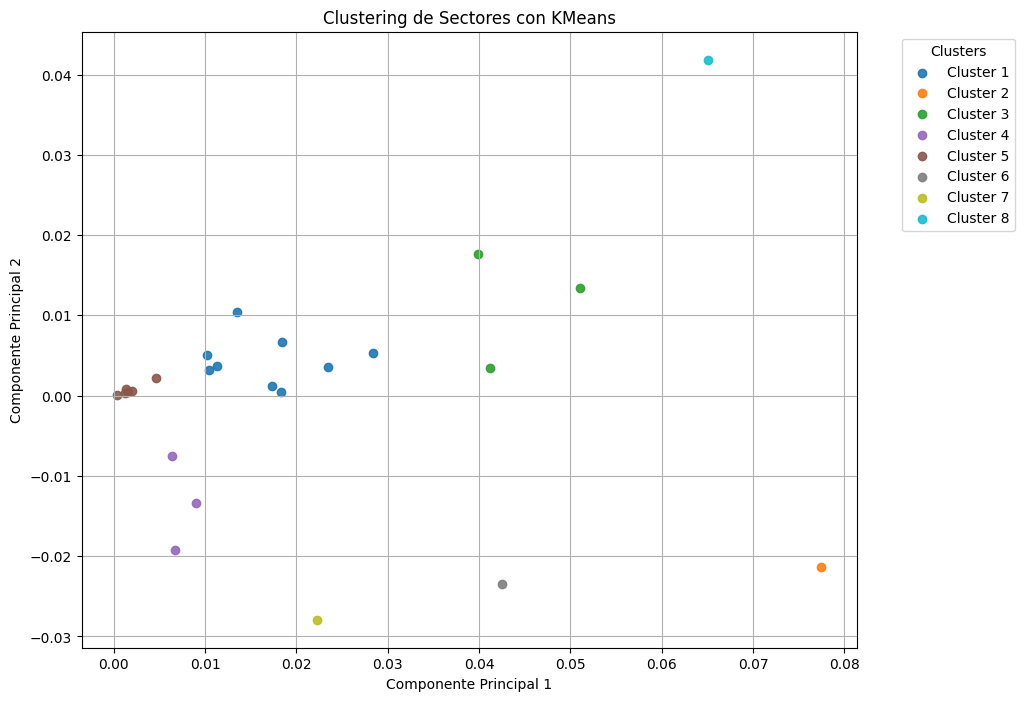

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Número de clusters
k = 8

kmeans = KMeans(n_clusters=k, random_state=42)
X = np.column_stack((xSLVreducido, ySLVreducido))
kmeans.fit(X)


labels = kmeans.labels_



plt.figure(figsize=(10, 8))
colores = cm.get_cmap('tab10', k)

for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colores(i), label=f'Cluster {i+1}', alpha=0.9)


plt.title("Clustering de Sectores con KMeans")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Los clusters que nos interesa analizar son:

- Cluster 1, tiene los siguientes sectores: \
    02 - Hunting and fishing \
    08 - Other processed food \
    14 - Wood and products of wood and cork

- Cluster 2: \
    11 - Textiles \
    12 - Apparel \
    15 - Pulp, paper, printing and publishing

- Cluster 6:  \
    04 - Mining and quarrying (non-energy) \
    20 - Rubber and plastics products \
    21 - Other non-metallic mineral products \
    22 - Iron and steel \
    25 - Machinery and equipment nec (excluding electrical machinery) \
    35 - Construction

- Cluster 8, muy cercanos al (0,0):  \
    09 - Beverage \
    13 - Footwear \
    17 - Basic chemical products \
    18 - Other chemical products (excluding pharmaceuticals) \
    23 - Non-ferrous metals \
    24 - Fabricated metal products, except machinery and equipment \
    27 - Electrical machinery and apparatus, nec \
    33 - Manufacturing nec; recycling (include furniture)

En el Cluster 1, los sectores 02 y 08 están relacionados con la producción de alimentos. El sector 14 no parece tener que ver con los otros.

En el Cluster 2, los sectores 11 y 12 son de producción de ropa, y el 15 no está relacionado.

En el Cluster 6 hay varios sectores en el rubro de la minería y la metalurgia, aparte del sector 20 que es de goma y plástico. Son sectores de industria pesada. 

El Cluster 8 agrupa industrias que luego de una investigacion sobre el pais, son poco relevantes en El Salvador.

Podemos ver que el Análisis de Componentes Principales está agrupando a los sectores según rubros o áreas de producción, esto puede ser porque los metodos y la maquinaria usada en la produccion es similar.

Hay que tener en cuenta que los sectores con más variabilidad (con componentes principales mas altos, los outliers) fueron eliminados para mejor visualizacion de los clusters.


# Consigna 9

Teniendo en cuenta que:

$(I-A)^{-1} = \lim_{n \to ∞} \sum_{i=0}^{n}A^i$

$H = A (I-A)^{-1} = A \lim_{n \to ∞} \sum_{i=0}^{n}A^i $

$H = \lim_{n \to ∞} \sum_{i=0}^{n}A \cdot A^i$

$H = \lim_{n \to ∞} \sum_{i=0}^{n}A^{i+1}$

Lo podemos reescribir como:

$H = \lim_{n \to ∞} \sum_{i=1}^{n}A^{i}$

Por lo tanto:

$H = (I-A)^{-1}-I$








# Consigna 10

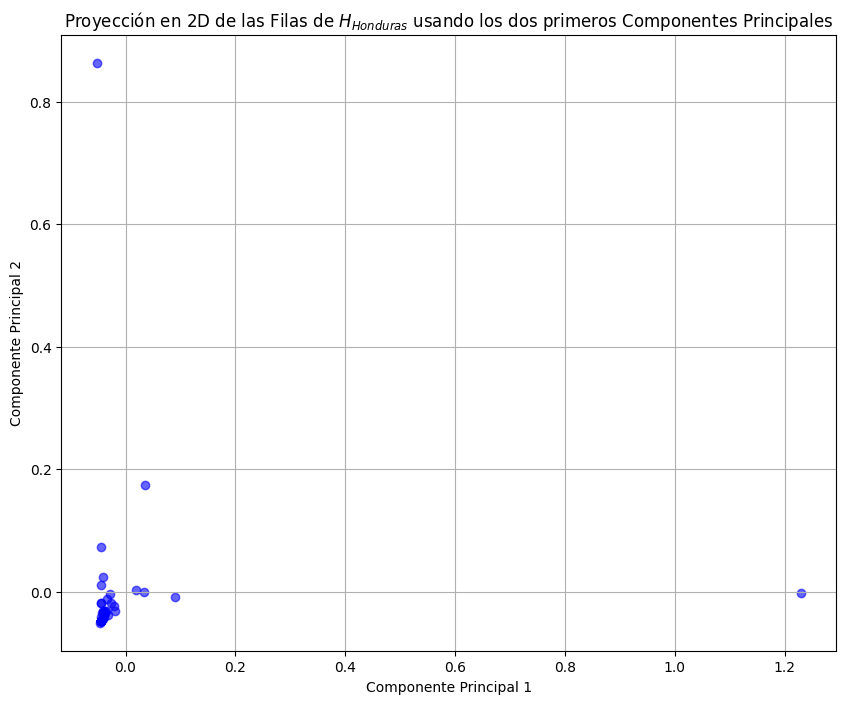

In [25]:
I = np.eye(40)
P, L, U = f.calcularLU(I - A_hnd_hnd)
inversaHND = f.inversaLU(P,L,U)

H_honduras = A_hnd_hnd @ inversaHND

# Normalizar
n = 40
E_40 = np.eye(n) - (1 / n) * np.ones((n, n))
H_hnd_hnd_normalizada = E_40 @ H_honduras

# matriz de covarianzas CH para A_hnd_hnd_normalizada
n = H_hnd_hnd_normalizada.shape[0]  # Número de sectores
CH = (np.transpose(H_hnd_hnd_normalizada) @ H_hnd_hnd_normalizada) / (n - 1)

# Primer autovalor y autovector usando el metodoPotencia

lambda111, v111, _ = f.metodoPotencia(CH, 0.999999999)

# Deflación de Hotelling
CH_deflacionada = CH - lambda111 * np.outer(v111, v111)

lambda222, v222, _ = f.metodoPotencia(CH_deflacionada, 0.999999999)
V = np.column_stack((v111, v222))

H_honduras_proyectado = H_hnd_hnd_normalizada @ V

# scatter plot de la proyección
plt.figure(figsize=(10, 8))
plt.scatter(H_honduras_proyectado[:, 0], H_honduras_proyectado[:, 1], color='b', alpha=0.6)
plt.title("Proyección en 2D de las Filas de $H_{Honduras}$ usando los dos primeros Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


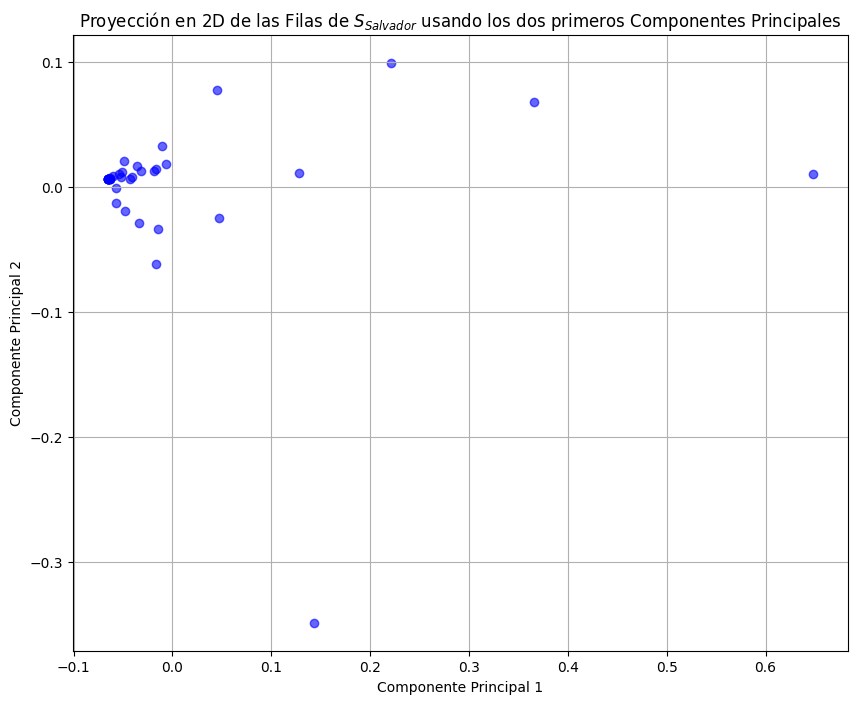

In [26]:
I = np.eye(40)
P, L, U = f.calcularLU(I - A_slv_slv)
inversaSLV = f.inversaLU(P,L,U)

H_salvador = A_slv_slv @ inversaSLV

# Normalizar
n = 40
E_40 = np.eye(n) - (1 / n) * np.ones((n, n))
H_slv_slv_normalizada = E_40 @ H_salvador

# matriz de covarianzas CH para A_slv_slv_normalizada
n = H_slv_slv_normalizada.shape[0]  # Número de sectores
CH = (np.transpose(H_slv_slv_normalizada) @ H_slv_slv_normalizada) / (n - 1)

# Primer autovalor y autovector usando el metodoPotencia

lambda1111, v1111, _ = f.metodoPotencia(CH, 0.999999999)

# Deflación de Hotelling
CH_deflacionada1 = CH - lambda1111 * np.outer(v1111, v1111)

lambda2222, v2222, _ = f.metodoPotencia(CH_deflacionada1, 0.999999999)
V = np.column_stack((v1111, v2222))

H_salvador_proyectado = H_slv_slv_normalizada @ V

# scatter plot de la proyección
plt.figure(figsize=(10, 8))
plt.scatter(H_salvador_proyectado[:, 0], H_salvador_proyectado[:, 1], color='b', alpha=0.6)
plt.title("Proyección en 2D de las Filas de $S_{Salvador}$ usando los dos primeros Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


# Consigna 11

In [27]:
distancias = np.linalg.norm(H_salvador_proyectado, axis=1)

indice_mas_cercano = np.argmin(distancias)
indice_mas_lejano = np.argmax(distancias)

# Perfiles de producción de los sectores más cercano y más lejano
perfil_mas_cercano_A = A_slv_slv[indice_mas_cercano, :]
perfil_mas_lejano_A = A_slv_slv[indice_mas_lejano, :]

perfil_mas_cercano_H = H_salvador[indice_mas_cercano, :]
perfil_mas_lejano_H = H_salvador[indice_mas_lejano, :]


print("Sector más cercano al origen:", indice_mas_cercano)
print("Sector más lejano al origen:", indice_mas_lejano)

Sector más cercano al origen: 10
Sector más lejano al origen: 39


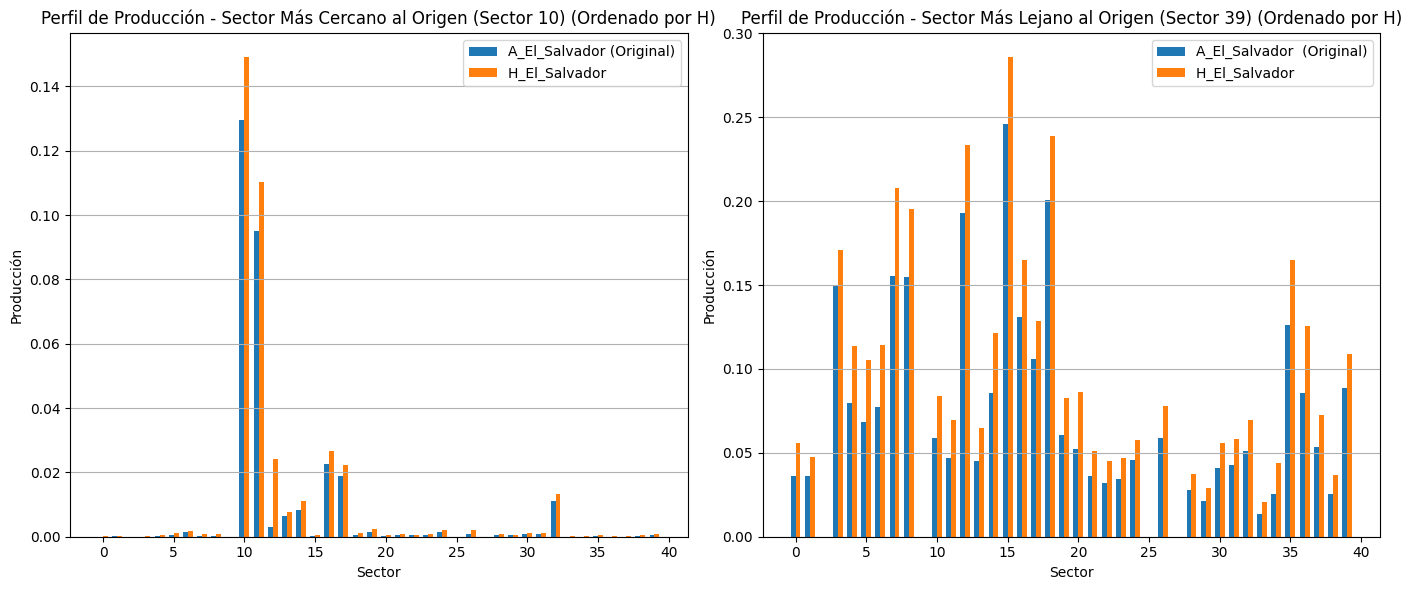

In [28]:

n_sectors = len(perfil_mas_cercano_H)
indices = np.arange(n_sectors)
width = 0.35
plt.figure(figsize=(14, 6))

# sector más cercano al origen
plt.subplot(1, 2, 1)
plt.bar(indices - width / 2, perfil_mas_cercano_A, width=width, label='A_El_Salvador (Original)')
plt.bar(indices + width / 2, perfil_mas_cercano_H, width=width, label='H_El_Salvador ')
plt.title("Perfil de Producción - Sector Más Cercano al Origen (Sector 10) (Ordenado por H)")
plt.xlabel("Sector")
plt.ylabel("Producción")
plt.legend()
plt.grid(axis='y')

# Sector más lejano al origen
plt.subplot(1, 2, 2)
plt.bar(indices - width / 2, perfil_mas_lejano_A, width=width, label='A_El_Salvador  (Original)')
plt.bar(indices + width / 2, perfil_mas_lejano_H, width=width, label='H_El_Salvador ')
plt.title("Perfil de Producción - Sector Más Lejano al Origen (Sector 39) (Ordenado por H)")
plt.xlabel("Sector")
plt.ylabel("Producción")
plt.legend()
plt.grid(axis='y')

# Ajuste de diseño para evitar superposiciones
plt.tight_layout()

# Muestra el gráfico
plt.show()

La matriz A_slv_slv Representa las relaciones de producción directas entre sectores de la economía de El salvador. Cada fila muestra cómo un sector se relaciona directamente con otros sectores. La matriz H hace algo similar, pero amplifica las conexiones entre sectores que están fuertemente interrelacionados.

La diferencia entre los sectores más cercano y más lejano al origen es que el más lejano está altamente conectado con los demas sectores y afecta mas a la produccion de cada uno, mientras que el más cercano tiene una baja interrelación con los otros sectores y afecta menos a la produccion del los mismos.
Esto lo vemos en la escala de los mismos, donde en el mas lejano la produccion de cada sector es significativamente mas alta para cada uno. 
Mientras que el más cercano tiene un pico en su mismo sector, pero la produccion en los otros no es tan variable y su volumen de produccion es significativamente menor.

Osea, quitar al sector 10 afectaria mucho menos a la economia total que quitar al sector 39 del sistema.

Parte de lo que hace PCA es escojer los autovectores que mayor variabilidad mantienen. Los vectores cercanos al origen contribuyen menos a la variabilidad total del sistemas y los mas lejanos afectas mas a la variabilidad, por esto sucede la diferencia en perfil de produccion de estos dos sectores.